# <span style="color:#0b486b">Visualization</span>

---

---

Importing the required packages. We will work with `matplotlib` package to viualialize


In [20]:
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Import data from vsc file. Show the summary of data.

In [21]:
data = pd.read_csv('PSID.csv')
#make married colom categorical
data['married'] = pd.Categorical(data['married'])
#print(data.head())
#print(data.dtypes)
data.describe()

,Seq No,intnum,persnum,age,educatn,earnings,hours,kids
count,4856.000000,4856.000000,4856.000000,4856.000000,4855.000000,4856.000000,4856.000000,4856.000000
mean,2428.500000,4598.101318,59.213550,38.462932,16.377137,14244.506178,1235.334843,4.481260
std,1401.950784,2761.971174,79.748556,5.595116,18.449502,15985.447449,947.175837,14.887856
min,1.000000,4.000000,1.000000,30.000000,0.000000,0.000000,0.000000,0.000000
25%,1214.750000,1905.000000,2.000000,34.000000,12.000000,85.000000,32.000000,1.000000
50%,2428.500000,5464.000000,4.000000,38.000000,12.000000,11000.000000,1517.000000,2.000000
75%,3642.250000,6655.000000,170.000000,43.000000,14.000000,22000.000000,2000.000000,3.000000
max,4856.000000,9306.000000,205.000000,50.000000,99.000000,240000.000000,5160.000000,99.000000


## <span style="color:#0b486b">1. Boxplot </span>

Draw boxplot diagrams to get initial insights on data

Draw boxplot for Kids

<Figure size 14400x7200 with 0 Axes>

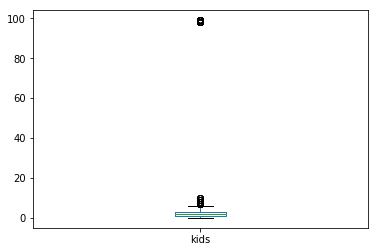

In [22]:
plt.figure(figsize=(200,100))
data.plot.box(y='kids')
plt.show()

Draw boxplot for Education level

<Figure size 14400x7200 with 0 Axes>

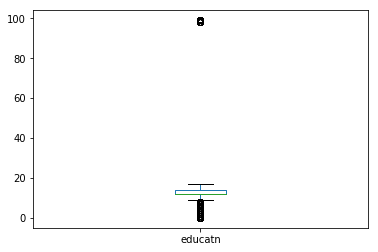

In [23]:
plt.figure(figsize=(200,100))
data.plot.box(y='educatn')
plt.show()

Draw boxplot for Education level

<Figure size 14400x7200 with 0 Axes>

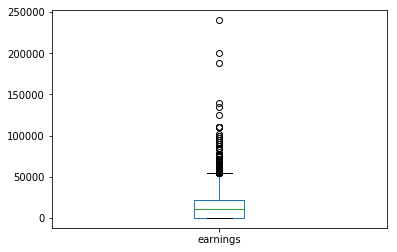

In [24]:
plt.figure(figsize=(200,100))
data.plot.box(y='earnings')
plt.show()

---
## <span style="color:#0b486b">Remove Outliers</span>

Remove outliers based on boxplot diagrams

<Figure size 14400x7200 with 0 Axes>

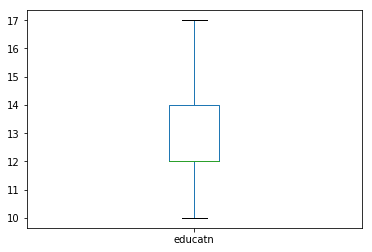

In [25]:
CleanedData = data[data.kids < 15]
CleanedData = CleanedData[CleanedData.educatn < 30]
CleanedData = CleanedData[CleanedData.educatn >= 10]
plt.figure(figsize=(200,100))
CleanedData.plot.box(y='educatn')
plt.show()
CleanedData.describe()

CleanedData.to_csv('CleanedData.csv')

---
## <span style="color:#0b486b">Correlation </span>

Correalation between columns

We can see 0.611034 realtionship between worked hours and earnings
We can see 0.364995 realtionship between education and earnings


In [42]:
data = pd.read_csv('CleanedData.csv')
data = data.iloc[:,1:-1]
del data['Seq No']
del data['persnum']
del data['intnum']

data.corr(method ='pearson') 


,age,educatn,earnings,hours,kids
age,1.000000,0.034053,0.113953,0.080526,0.132700
educatn,0.034053,1.000000,0.364995,0.114666,-0.218916
earnings,0.113953,0.364995,1.000000,0.611034,-0.233729
hours,0.080526,0.114666,0.611034,1.000000,-0.172628
kids,0.132700,-0.218916,-0.233729,-0.172628,1.000000


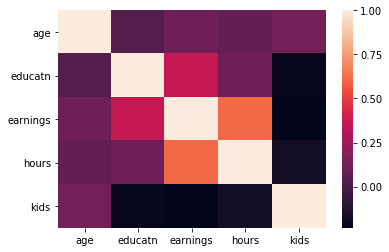

In [43]:
corr = data.corr()
sns.heatmap(corr)

---
## <span style="color:#0b486b">Hypothesis 1</span>

<strong>Eduation has an positive impact on a persons earnings.</strong>

If correlation is c

<ul>
    <li>H0 : c = 0</li>
    <li>Ha : c > 0</li>
</ul>



from above correlation table, c between education and earnings is 0.364995 (c > 0)

therefore, <strong>statistics support for alternative hypothesis with suffiecnt statistical significance.</strong>

Let's see the scatter plot for above realtionship




<Figure size 14400x7200 with 0 Axes>

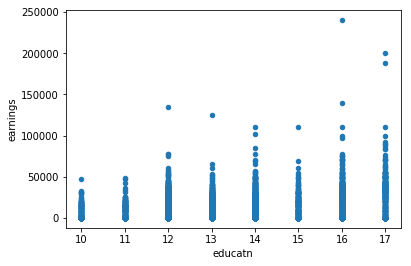

In [27]:
data = pd.read_csv('CleanedData.csv')
data.corr(method ='pearson') 
plt.figure(figsize=(200,100))
data.plot.scatter(x='educatn', y='earnings')
plt.show()

---
## <span style="color:#0b486b">Hypothesis 2</span>

<strong>Married people earn more than others</strong>

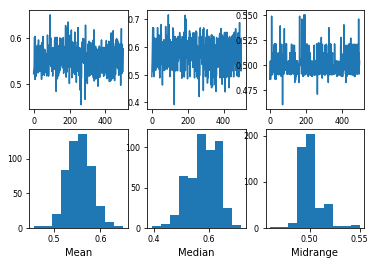

In [28]:
marriedData = data[data.married=='married']
unmarriedData = data[data.married!='married']

s = pd.Series(np.random.uniform(size=100))
fig = pd.plotting.bootstrap_plot(s)
